In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [2]:
df_train=X
df_predict=y

In [3]:
df_train.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df_predict.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


In [5]:
#checking for null values
df_train.isnull().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

In [6]:
df_predict.isnull().sum()

Diagnosis    0
dtype: int64

In [7]:
#check the number of values belonging to each class
df_predict.value_counts()

Diagnosis
B            357
M            212
Name: count, dtype: int64

<Axes: >

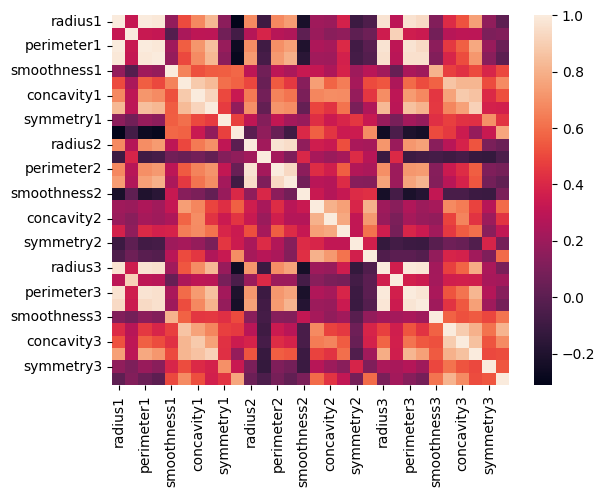

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_train.corr())

In [9]:
#Label encode the necessary columns

from sklearn.preprocessing import LabelEncoder
df_train=df_train.apply(LabelEncoder().fit_transform)
df_predict=df_predict.apply(LabelEncoder().fit_transform)

In [10]:
#Feature enginering, if needed

from sklearn. preprocessing import StandardScaler, Normalizer
#Scaling the data
scaler= StandardScaler()
scaled_data=scaler.fit_transform(df_train)

In [11]:
normalize=Normalizer()
normalized_data=normalize.fit_transform(scaled_data)

In [12]:
import pandas as pd
df_train=pd.DataFrame(normalized_data)

In [13]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.146712,-0.216919,0.154730,0.145359,0.171854,0.206480,0.199610,0.200959,0.213630,0.208791,...,0.198469,-0.179784,0.195522,0.191152,0.170110,0.206229,0.199186,0.208687,0.204853,0.189097
1,0.311650,-0.072401,0.278495,0.299923,-0.185545,-0.069719,0.069016,0.156293,0.014294,-0.205301,...,0.298174,-0.071241,0.261263,0.289827,-0.083057,-0.065577,0.016611,0.215008,-0.034711,0.130980
2,0.230726,0.101702,0.220053,0.219690,0.171229,0.189290,0.210999,0.245245,0.181557,-0.065514,...,0.219723,0.008203,0.203571,0.217711,0.115059,0.208086,0.171725,0.248612,0.216083,0.093204
3,-0.133251,0.062151,-0.091769,-0.154927,0.220405,0.233785,0.212084,0.197274,0.251688,0.249271,...,-0.006733,0.042458,0.016890,-0.068620,0.253987,0.239016,0.215927,0.230651,0.243762,0.236661
4,0.250336,-0.210399,0.240079,0.243445,0.091856,0.146625,0.217091,0.226117,0.007918,-0.108468,...,0.201310,-0.246790,0.205353,0.200650,0.047820,-0.018020,0.151884,0.137838,-0.186620,-0.054582


In [14]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score,roc_curve, recall_score, precision_score, confusion_matrix

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(df_train, df_predict, test_size=0.2, random_state=42)

In [16]:
#Random Forest Classifier

rf_classifier=RandomForestClassifier()
rf_classifier.fit(X_train,y_train)
y_pred= rf_classifier.predict(X_test)
rf_accuracy=accuracy_score(y_test, y_pred)
rf_recall=recall_score(y_test,y_pred)
rf_f1=f1_score(y_test,y_pred)
rf_confusion=confusion_matrix(y_test,y_pred)
rf_precision= precision_score(y_test, y_pred)


print("Accuracy", rf_accuracy)
print("Precison", rf_precision)
print("Recall", rf_recall)
print("F1 Score", rf_f1)
print(rf_confusion)

c:\Users\pooja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy 0.9736842105263158
Precison 0.9761904761904762
Recall 0.9534883720930233
F1 Score 0.9647058823529412
[[70  1]
 [ 2 41]]


In [17]:

fpr, tpr,_ =roc_curve(y_test, rf_classifier.predict_proba(X_test)[:,1])

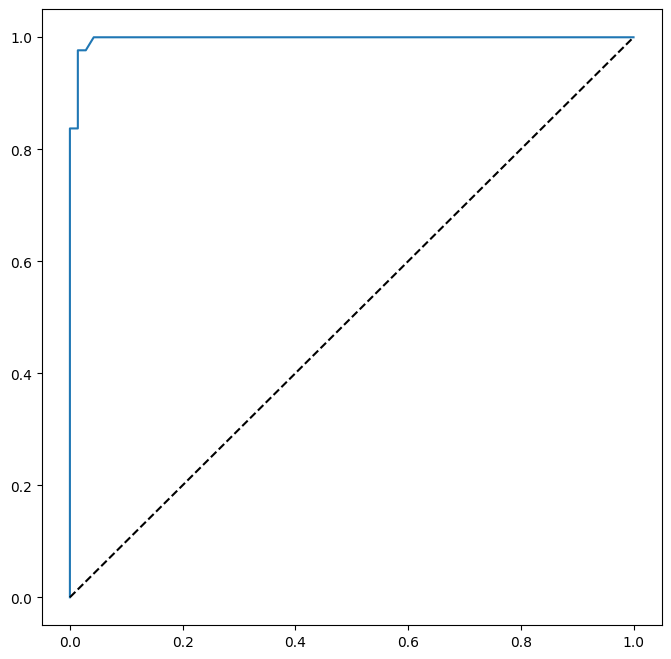

In [18]:
plt.figure(figsize=(8,8))
plt.plot(fpr,tpr,label="ROC Curve")
plt.plot([0,1],[0,1],'k--')

In [19]:
#Bagging Classifier
bagging_clf=BaggingClassifier()
bagging_clf.fit(X_train,y_train)
y_pred=bagging_clf.predict(X_test)
bg_accuracy=accuracy_score(y_test, y_pred)
bg_recall=recall_score(y_test,y_pred)
bg_f1=f1_score(y_test,y_pred)
bg_confusion=confusion_matrix(y_test,y_pred)
bg_precision= precision_score(y_test, y_pred)


print("Accuracy", bg_accuracy)
print("Precison", bg_precision)
print("Recall", bg_recall)
print("F1 Score", bg_f1)
print(bg_confusion)

Accuracy 0.9649122807017544
Precison 0.975609756097561
Recall 0.9302325581395349
F1 Score 0.9523809523809523
[[70  1]
 [ 3 40]]


c:\Users\pooja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


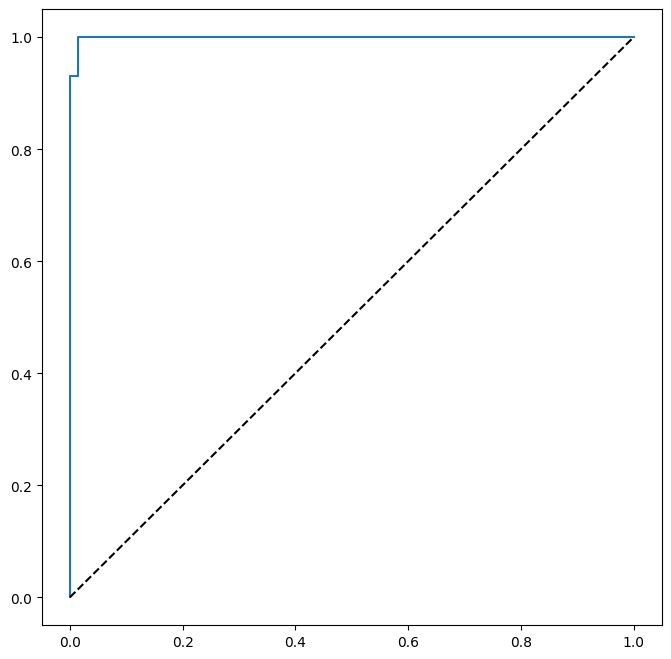

In [20]:
fpr, tpr,_ =roc_curve(y_test,bagging_clf.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,8))
plt.plot(fpr,tpr,label="ROC Curve")
plt.plot([0,1],[0,1],'k--')

In [21]:
#Boosting Classifier
boost= AdaBoostClassifier()
boost.fit(X_train,y_train)
y_pred=boost.predict(X_test)
boost_accuracy=accuracy_score(y_test, y_pred)
boost_recall=recall_score(y_test,y_pred)
boost_f1=f1_score(y_test,y_pred)
boost_confusion=confusion_matrix(y_test,y_pred)
boost_precision= precision_score(y_test, y_pred)


print("Accuracy", boost_accuracy)
print("Precison", boost_precision)
print("Recall", boost_recall)
print("F1 Score", boost_f1)
print(boost_confusion)

c:\Users\pooja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\pooja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy 0.9649122807017544
Precison 0.9534883720930233
Recall 0.9534883720930233
F1 Score 0.9534883720930233
[[69  2]
 [ 2 41]]


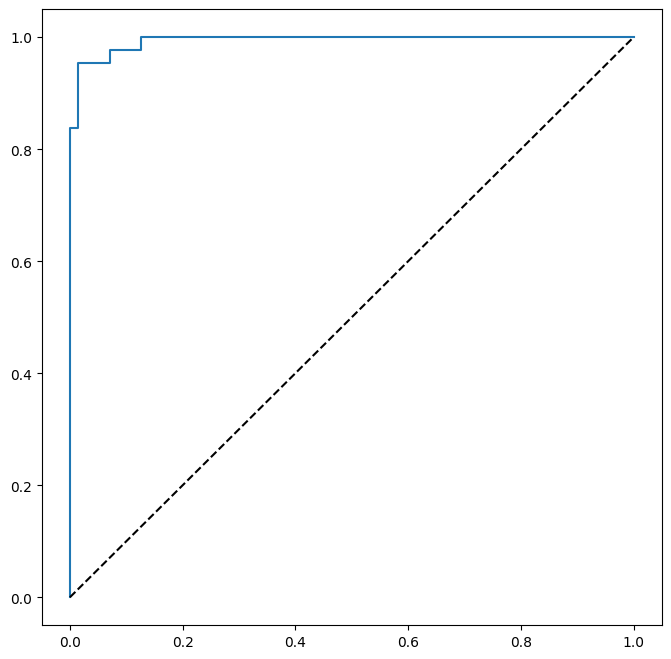

In [22]:
fpr, tpr,_ =roc_curve(y_test,boost.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,8))
plt.plot(fpr,tpr,label="ROC Curve")
plt.plot([0,1],[0,1],'k--')